In [1]:
from manim import *
from numpy import linalg as npl
import matplotlib.pyplot as plt
import jupyter_capture_output
from scipy.interpolate import make_interp_spline, BSpline

video_scene = " -v WARNING --progress_bar None --disable_caching moi_Scene"
image_scene = f" -v WARNING --progress_bar None --disable_caching -r {2*427},{2*240}  -s moi_Scene"

Manim Community v0.16.0.post0

Jupyter Capture Output v0.0.6


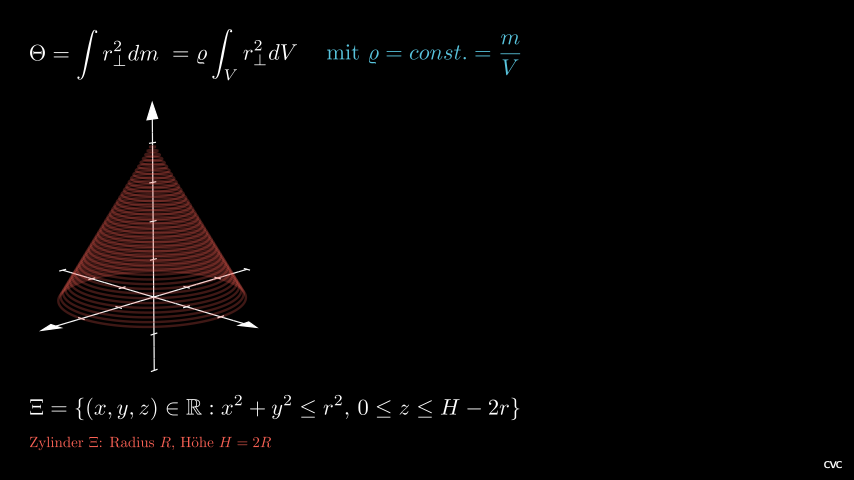

In [116]:
%%capture_video --path "animations/moment_of_inertia/moment_of_inertia.mp4"
%%manim -ql --fps 20 $video_scene

class moi_Scene(ThreeDScene):
    def construct(self):
        CO3D = [-6, 0, -6]

        CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
        self.add(CVC)

        moi_eq1 = MathTex(r'\Theta=\int r_{\perp}^2 dm', font_size = 36).align_on_border(UP + LEFT, buff = 0.5)
        moi_eq2 = MathTex(r'=\varrho\int_V r_{\perp}^2 dV', font_size = 36).next_to(moi_eq1, RIGHT)
        moi_eq3 = MathTex(r'\mathrm{mit}~\varrho=const.=\frac{m}{V}', font_size = 36, color = BLUE).next_to(moi_eq2, 2*RIGHT)

        cone_eq1 = MathTex(r'\Xi=\{(x, y, z)\in\mathbb{R}:x^2+y^2\leq r^2,\,0\leq z\leq H-2r\}', font_size = 36).align_on_border(LEFT + DOWN).shift(0.5*UP)
        cone_eq2 = Tex(r'$\mathrm{Zylinder}$ $\Xi$: Radius $R$, Höhe $H=2R$', font_size = 24, color = RED).align_on_border(LEFT + DOWN)
        self.add(cone_eq1, cone_eq2)

        #self.add(moi_eq1, moi_eq2, moi_eq3)
        self.add_fixed_in_frame_mobjects(moi_eq1, moi_eq2, moi_eq3)

        
        ax = ThreeDAxes(
            x_range = (-3, 3, 1), y_range = (-3, 3, 1), z_range = (-2, 5, 1),
            x_length = 6, y_length = 6, z_length = 6, axis_config = {'tip_length': 0.05, 'tip_width': 0.3},
            ).move_to(CO3D).rotate(
                axis = [1, 0, 0], angle = 6*PI/4
                ).rotate(
                    axis = [0, 1, 0], angle = 5*PI/4
                    ).rotate(axis = [1, 0, 0], angle = PI/12).rotate(
                        axis = [0, 1, 0], angle = PI/16
                        )#.add_coordinates()

        ax1_dot = Dot(ax.coords_to_point(2, 0, 0), color = RED, radius = 0.1)
        ax2_dot = Dot(ax.coords_to_point(0, 2, 0), color = BLUE, radius = 0.1)
        #self.add(ax1_dot, ax2_dot)

        for z in np.arange(0, 4.01, 0.1):
            r = (4 - z) / 2
            cone_circ = ax.plot_parametric_curve(lambda phi: np.array([r*np.cos(phi), r*np.sin(phi), z]), t_range = [0, 2*PI], stroke_opacity = 0.25, color = RED)
            self.add(cone_circ)
        
        #self.set_camera_orientation(phi=2*PI/4.75, theta=PI/5, frame_center = CO3D)
        #self.camera(phi=2*PI/4.75, theta=PI/5)
        #cam = Camera(frame_center = CO3D)
        self.add(ax)
        #self.play(Rotate(ax, axis = [0, 1, 0], angle = 2*PI), run_time = 5)
        #self.begin_ambient_camera_rotation(4)